In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def age_range_to_int(age_range):
    splited = age_range.split('-')
    if len(splited) == 2:
        return (int(splited[0]) + int(splited[1])) / 2
    else:
        return int(age_range.split(" ")[0]) + 5

In [6]:
# preprocessing
data = pd.read_csv('pandas_data.csv')




/home/youlyu2/you_venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 1.00


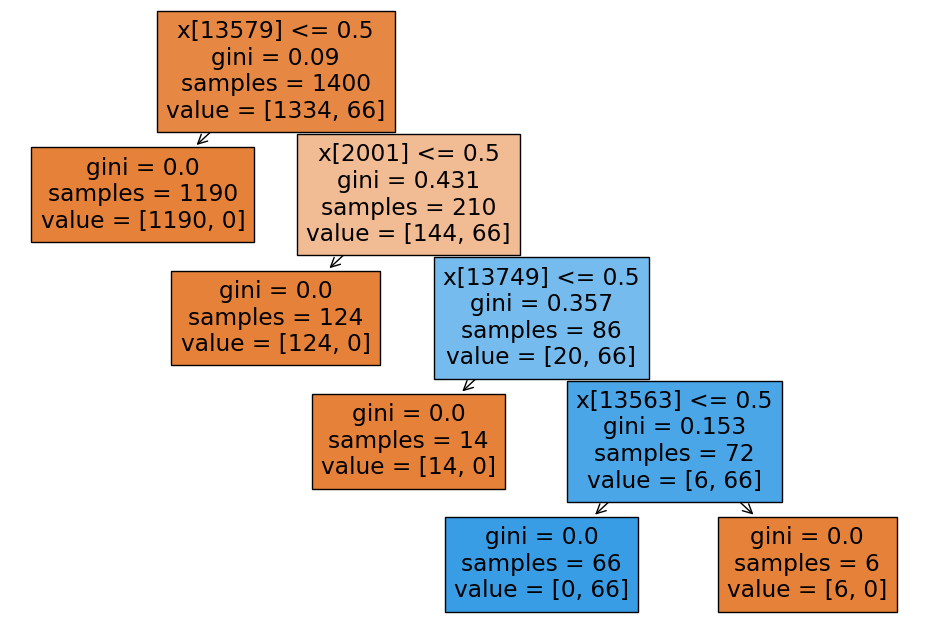

In [5]:

# Load your dataset
# Replace 'your_data.csv' with the path to your dataset file
data = pd.read_csv('pandas_data.csv')

# Convert 'Age' feature from string to int
data['age'] = data['age'].map(age_range_to_int)

# Select your features and target variable
# Replace 'feature_columns' with your features columns and 'target_column' with your target column
X = data[data.columns.difference(['response', 'actor_id'])]
y = data['response']

encoder = OneHotEncoder(sparse=False)
X_encoded = encoder.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
# You can adjust parameters like max_depth, min_samples_split, etc. as needed
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model using the training sets
dt_classifier.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# You can also visualize the tree if you want (optional)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True)
plt.show()
